# **Breast Cancer Wisconsin (benign or malignant)<br>with Feed Forward Neural Network: 97%**


In [1]:
# REQUIRED LIBRARIES.

# For data manipulation and analysis
import pandas as pd
# For numerical operations
import numpy as np
# For plotting and data visualization
import matplotlib.pyplot as plt
# For statistical data visualization
import seaborn as sns
# For selecting the top 15 features
from sklearn.feature_selection import SelectKBest, chi2
# For selecting the top 15 features
from sklearn.feature_selection import RFE
# For selecting the top 15 features
from sklearn.ensemble import RandomForestClassifier
# For selecting important features
from sklearn.linear_model import LassoCV
# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder
#For standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# For building sequential neural network models
from tensorflow.keras.models import Sequential
# For making a fully connected neural network layers
from tensorflow.keras.layers import Dense, Dropout
# Adam optimizer for training neural networks
from tensorflow.keras.optimizers import Adam
# For early stopping and saving the best model during training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# For generating classification metrics
from sklearn.metrics import classification_report
# For confusion matrix calculation and visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# For ROC curve calculation and AUC score
from sklearn.metrics import roc_curve, roc_auc_score
# For precision-recall curve calculation
from sklearn.metrics import precision_recall_curve
# For calculating average precision score
from sklearn.metrics import average_precision_score
# For various classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# For calculating specificity
from imblearn.metrics import specificity_score
# For saving and loading model objects
import pickle
# For loading saved neural network models
from tensorflow.keras.models import load_model

## **Step 1. Data analysis and preprocessing**

In [51]:
# Read the dataset.
df_data = pd.read_csv('data.csv')
df_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# Show dataset columns
print('Data columns:\n')
print(df_data.columns)
print('\nTotal columns:', len(df_data.columns))

Data columns:

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Total columns: 33


In [4]:
# Data statistic
df_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Checking missing values
df_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Show columns with missing values.
missing_data = df_data.loc[:, df_data.isnull().any()].columns
print('Column with missing values:', missing_data)

Column with missing values: Index(['Unnamed: 32'], dtype='object')


In [7]:
# Remove columns (features) are not importance for further research
df_remove = df_data.drop(columns=['id', 'Unnamed: 32'])

# Use f-string to print which columns were removed
removed_columns = ['id', 'Unnamed: 32']

print(f'Columns {removed_columns} were removed')

df_remove

Columns ['id', 'Unnamed: 32'] were removed


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
# Checking for missing values again.
sum_missing = df_remove.isnull().T.any().T.sum()
print('Sum of missing data:', sum_missing)

Sum of missing data: 0


In [9]:
# Checking duplicates in the dataset.
print('Number of duplicates:', df_remove.duplicated().sum())

Number of duplicates: 0


In [10]:
# Rename the dataset to a df_new
df_new = df_remove
df_new

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
# Data statistic after removing two columns
df_new.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# Checking data types
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
print('The unique number of data values:\n')
df_new.nunique()

The unique number of data values:



diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [14]:
# Count the number of occurrences of benign ('B') and malignant ('M') diagnose
df_new['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

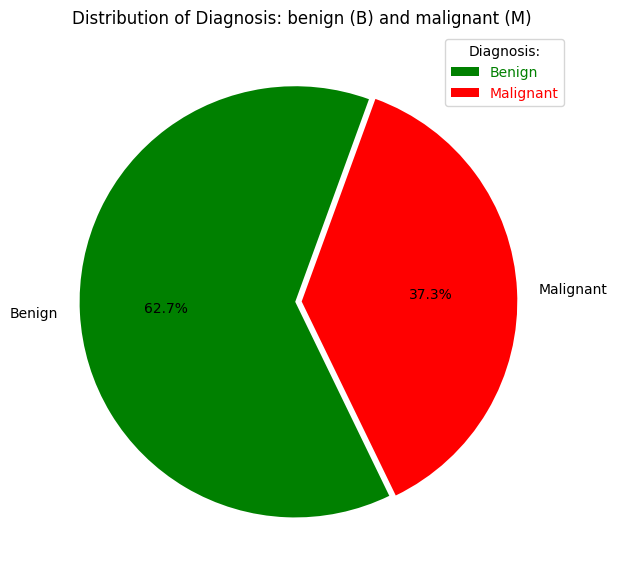

In [15]:
# Pie chart:

# Labels for the pie chart
labels = 'Benign', 'Malignant'
# Colors for the pie chart segments
colors = 'green', 'red'
# Explode setting to separate a slice from the pie
myexplode = [0.03, 0]

# # Create a figure
fig = plt.figure(figsize =(10, 7))
plt.pie(df_new['diagnosis'].value_counts(),
        colors=colors,     # Assign colors to the slices
        labels=labels,     # Assign labels to the slices
        autopct='%1.1f%%', # Display the percentage of each slice
        explode=myexplode, # Assign separated
        startangle=70)     # Start the pie chart at a 70 degree angle

plt.legend(title='Diagnosis:',       # Title of the legend
           labelcolor='linecolor')   # Color of the labels in the legend

# Show plot.
plt.title('Distribution of Diagnosis: benign (B) and malignant (M)')
# Save the figure
plt.savefig('diagnosis.png', bbox_inches='tight')
plt.show()

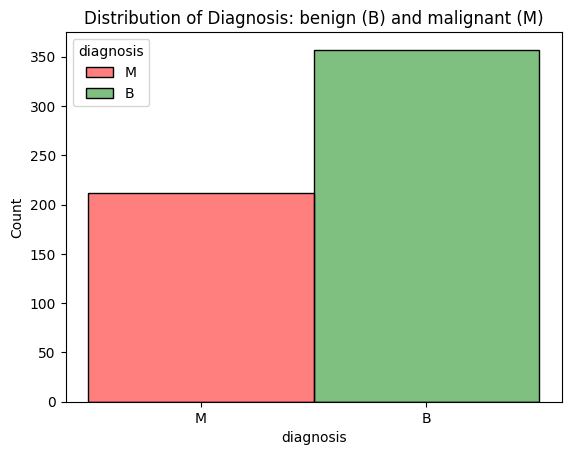

In [16]:
# Histogram plot:

# Define a custom color palette
color = {'B': 'green', 'M': 'red'}
# Distribution of diagnosis: benign ('B') and malignant ('M').
sns.histplot(data=df_new, x='diagnosis', hue='diagnosis', palette=color)
plt.title('Distribution of Diagnosis: benign (B) and malignant (M)')
plt.show()

### **Label Encoder to convert categorical values ('diagnosis') into numerical ones 0, 1**

In [17]:
# Assign Label Encoder
lab_enc = LabelEncoder()
for column in ['diagnosis']:
  df_new[column] = lab_enc.fit_transform(df_new[column])

df_new

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### **Calculating Pearson correlation coefficients for all features**

In [18]:
# Assign correlation
get_corr = df_new.corr(method='pearson')
get_corr.style.background_gradient(cmap='Greens')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### **Key observations from the given correlation matrix**

**1. Diagnosis and Other Variables**    

<u>High Positive Correlations</u>:

- radius_mean (0.730)
- perimeter_mean (0.743)
- area_mean (0.709)
- concave points_mean (0.777)
- concavity_mean (0.696)

These variables are strongly positively correlated with the diagnosis,   
indicating that higher values for these features are associated with malignant tumors.

<u>Moderate Positive Correlations</u>:

- compactness_mean (0.597)
- radius_se (0.567)
- perimeter_se (0.556)
- area_se (0.548)
- texture_mean (0.415)

These features also have a positive relationship with the diagnosis but are less strongly correlated.

<u>Low to Negligible Correlations</u>:

- smoothness_mean (0.359)
- symmetry_mean (0.331)
- fractal_dimension_mean (-0.013)

These variables have very weak correlations with the diagnosis,    
indicating a less significant relationship.


**2. Inter-Variable Relationships**

<u>Strong Positive Inter-Variable Correlations</u>:

- radius_mean and perimeter_mean (0.998)
- radius_mean and area_mean (0.987)
- perimeter_mean and area_mean (0.987)
- concave points_mean and concavity_mean (0.921)

These pairs of features are highly correlated with each other,    
suggesting they provide similar information about the tumors.

### **Create a Heatmap of the Correlation Matrix for all features**

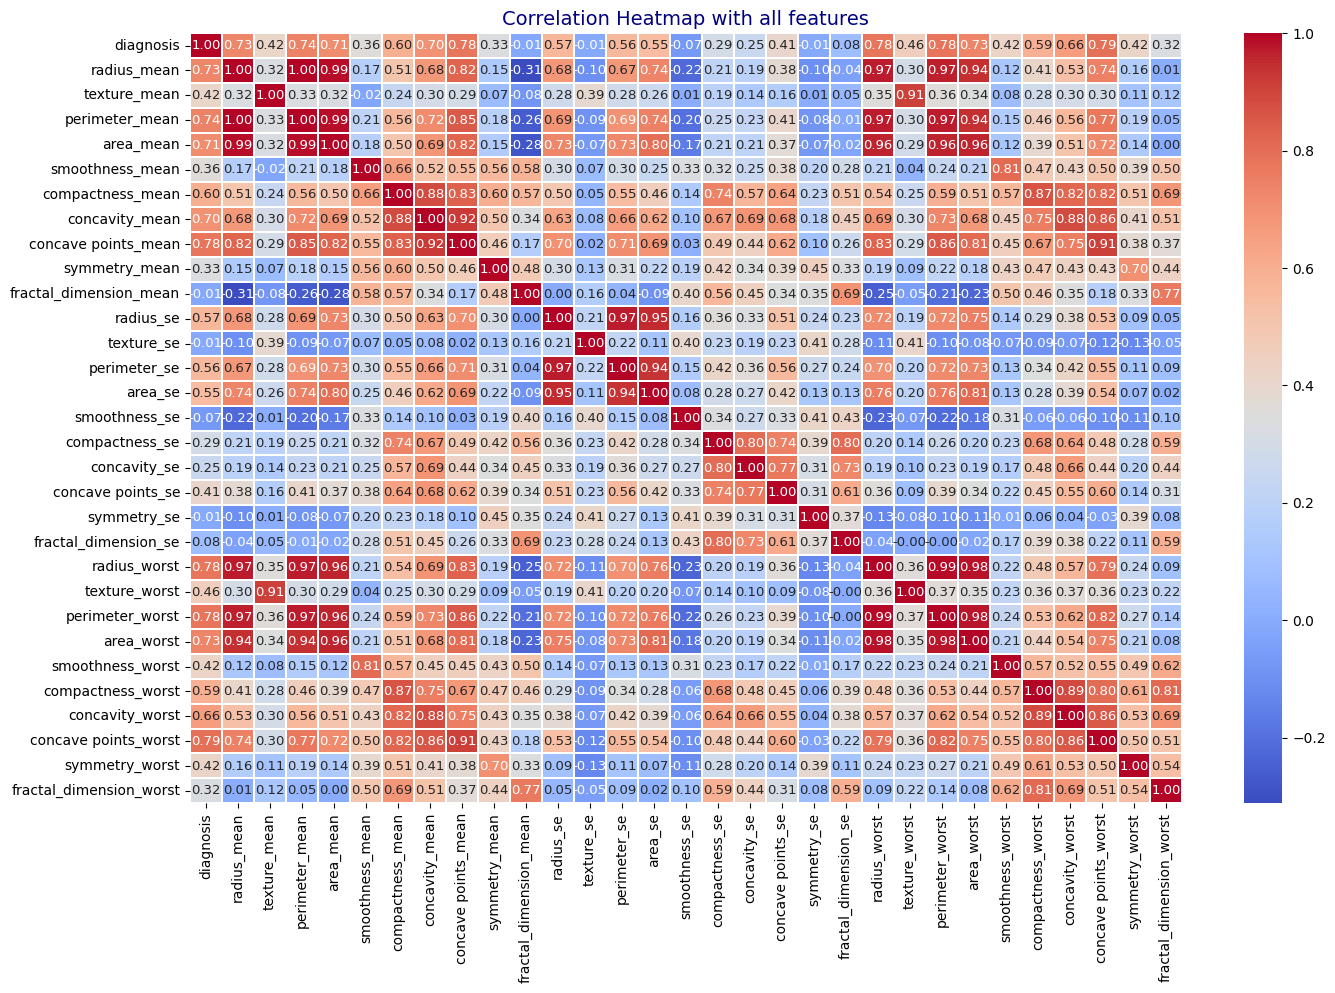

In [19]:
# Create a heatmap using seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(get_corr, annot=True, annot_kws={"size": 9.5},
            fmt=".2f", cmap='coolwarm', linewidths=0.005)
plt.title('Correlation Heatmap with all features', color='navy', fontsize=14)
plt.show()

# **Step 2. Implementing Feature Selection**

In [20]:
# Separate features and target
X = df_new.drop('diagnosis', axis=1)
y = df_new['diagnosis']

### **1. Univariate Feature Selection**

#### This method selects features based on statistical tests like chi-square

In [21]:
# Select the top 15 features using the chi-squared statistical test
select_k_best = SelectKBest(chi2, k=15)
X_best = select_k_best.fit_transform(X, y)

# Get selected feature names
selected_features_k_best = X.columns[select_k_best.get_support()]
print('Selected features using Univariate Feature Selection:\n')
print(selected_features_k_best)
print('\nHas been chosen', len(selected_features_k_best), 'features')

Selected features using Univariate Feature Selection:

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'radius_se', 'perimeter_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

Has been chosen 15 features


### **2. Recursive Feature Elimination**

#### This method recursively removes the least important features and builds the model

In [22]:
# Select the top 15 features with Random Forest Classifier
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=15)
X_rfe = rfe.fit_transform(X, y)

# Get selected feature names
selected_features_rfe = X.columns[rfe.get_support()]
print("Selected features using Recursive Feature Elimination:\n")
print(selected_features_rfe)
print('\nHas been chosen', len(selected_features_rfe), 'features')


Selected features using Recursive Feature Elimination:

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

Has been chosen 15 features


### **3. Tree-based Feature Selection**

#### This method uses the feature importance scores from a tree-based model (like Random Forest)

In [23]:
# Tree-based Feature Selection using feature importances from Random Forest
model.fit(X, y)
importances = model.feature_importances_
# This filters returns the features with scores greater than 0.05
important_features = X.columns[importances > 0.05]

print('Selected features using Tree-based Feature Selection:\n')
print(important_features)
print('\nHas been chosen', len(important_features), 'features')

Selected features using Tree-based Feature Selection:

Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

Has been chosen 8 features


### **4. L1 Regularization (Lasso)**

#### This method uses Lasso regression, which can shrink some coefficients to zero, effectively performing feature selection.

In [24]:
# L1 Regularization (Lasso) to select important features
lasso = LassoCV()
lasso.fit(X, y)
lasso_coefficients = lasso.coef_
# Return the names of the features with non-zero coefficients
important_features_lasso = X.columns[lasso_coefficients != 0]

print('Selected features using L1 Regularization (Lasso):\n')
print(important_features_lasso)
print('\nHas been chosen', len(important_features_lasso), 'features')

Selected features using L1 Regularization (Lasso):

Index(['area_mean', 'texture_worst', 'perimeter_worst', 'area_worst'], dtype='object')

Has been chosen 4 features


# **Step 3. Creating a new dataset with only the selected features**
### **Features chosen by the Univariate Feature Selection method**
#### NOTE: This dataset will be used in Step 5 to create the 'df_scaled' dataset for training the Feed Forward Neural Network.

In [25]:
# The best 15 features

# Get selected feature names
k_best_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'concavity_mean', 'radius_se', 'perimeter_se', 'area_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst'
]

# Filter the DataFrame to include only selected features
# 'diagnosis' is a target variable
df_k_best = df_new[['diagnosis'] + k_best_features]

# Print the selected features DataFrame
df_k_best

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,10.38,122.80,1001.0,0.30010,1.0950,8.589,153.40,25.380,17.33,184.60,2019.0,0.66560,0.7119,0.2654
1,1,20.57,17.77,132.90,1326.0,0.08690,0.5435,3.398,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,21.25,130.00,1203.0,0.19740,0.7456,4.585,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,20.38,77.58,386.1,0.24140,0.4956,3.445,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,14.34,135.10,1297.0,0.19800,0.7572,5.438,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.24390,1.1760,7.673,158.70,25.450,26.40,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,28.25,131.20,1261.0,0.14400,0.7655,5.203,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,28.08,108.30,858.1,0.09251,0.4564,3.425,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418
567,1,20.60,29.33,140.10,1265.0,0.35140,0.7260,5.772,86.22,25.740,39.42,184.60,1821.0,0.86810,0.9387,0.2650


# **Step 4. Find and analyze the most impactful features from the previous fifteen**


### **Implementing feature selection to visualize the most impactful ones for malignant cancer**

In [26]:
# Separate features and target from the 15 selected features
X_selected = df_k_best.drop('diagnosis', axis=1)
y_selected = df_k_best['diagnosis']

In [27]:
# Select the top 5 features from the 15 previously selected
select_5_best = SelectKBest(chi2, k=5)
X_5_best = select_5_best.fit_transform(X_selected, y_selected)

# Get selected feature names
selected_5_features = X_selected.columns[select_5_best.get_support()]
print('Selected features:\n')
print(selected_5_features)
print('\nHas been chosen', len(selected_5_features), 'features')

Selected features:

Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst'],
      dtype='object')

Has been chosen 5 features


### **Creating a new dataset with 5 selected features**

In [28]:
# The best 5 features

# Get selected feature names
best_5_features = ['perimeter_mean', 'area_mean', 'area_se',
                   'perimeter_worst', 'area_worst']

# Filter the DataFrame to include only 5 selected features
# 'diagnosis' is a target variable
df_5_best = df_new[['diagnosis'] + best_5_features]

# Print the selected features DataFrame
df_5_best

,diagnosis,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst
0,1,122.80,1001.0,153.40,184.60,2019.0
1,1,132.90,1326.0,74.08,158.80,1956.0
2,1,130.00,1203.0,94.03,152.50,1709.0
3,1,77.58,386.1,27.23,98.87,567.7
4,1,135.10,1297.0,94.44,152.20,1575.0
...,...,...,...,...,...,...
564,1,142.00,1479.0,158.70,166.10,2027.0
565,1,131.20,1261.0,99.04,155.00,1731.0
566,1,108.30,858.1,48.55,126.70,1124.0
567,1,140.10,1265.0,86.22,184.60,1821.0


### **Calculating Pearson correlation coefficients for 5 selected features**

In [29]:
# Assign correlation
get_corr_5 = df_5_best.corr(method='pearson')
get_corr_5.style.background_gradient(cmap='Greens')

,diagnosis,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst
diagnosis,1.000000,0.742636,0.708984,0.548236,0.782914,0.733825
perimeter_mean,0.742636,1.000000,0.986507,0.744983,0.970387,0.941550
area_mean,0.708984,0.986507,1.000000,0.800086,0.959120,0.959213
area_se,0.548236,0.744983,0.800086,1.000000,0.761213,0.811408
perimeter_worst,0.782914,0.970387,0.959120,0.761213,1.000000,0.977578
area_worst,0.733825,0.941550,0.959213,0.811408,0.977578,1.000000


### **Create a Heatmap of the Correlation Matrix for 5 features**

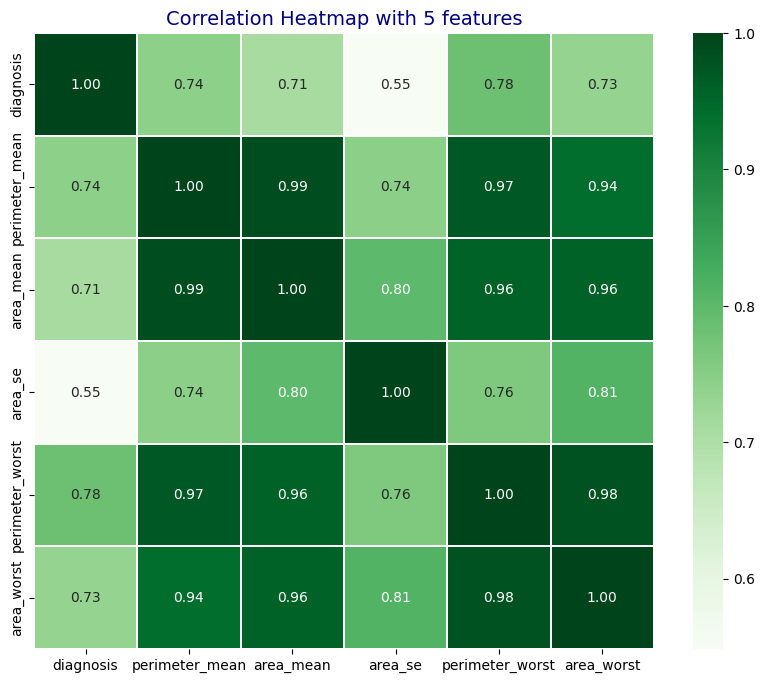

In [30]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(get_corr_5, annot=True, annot_kws={"size": 10},
            fmt=".2f", cmap='Greens', linewidths=0.005)
plt.title('Correlation Heatmap with 5 features', color='navy', fontsize=14)
# Save the figure
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

#### **Visualize the relationships between these 5 selected features**

<Figure size 1000x800 with 0 Axes>

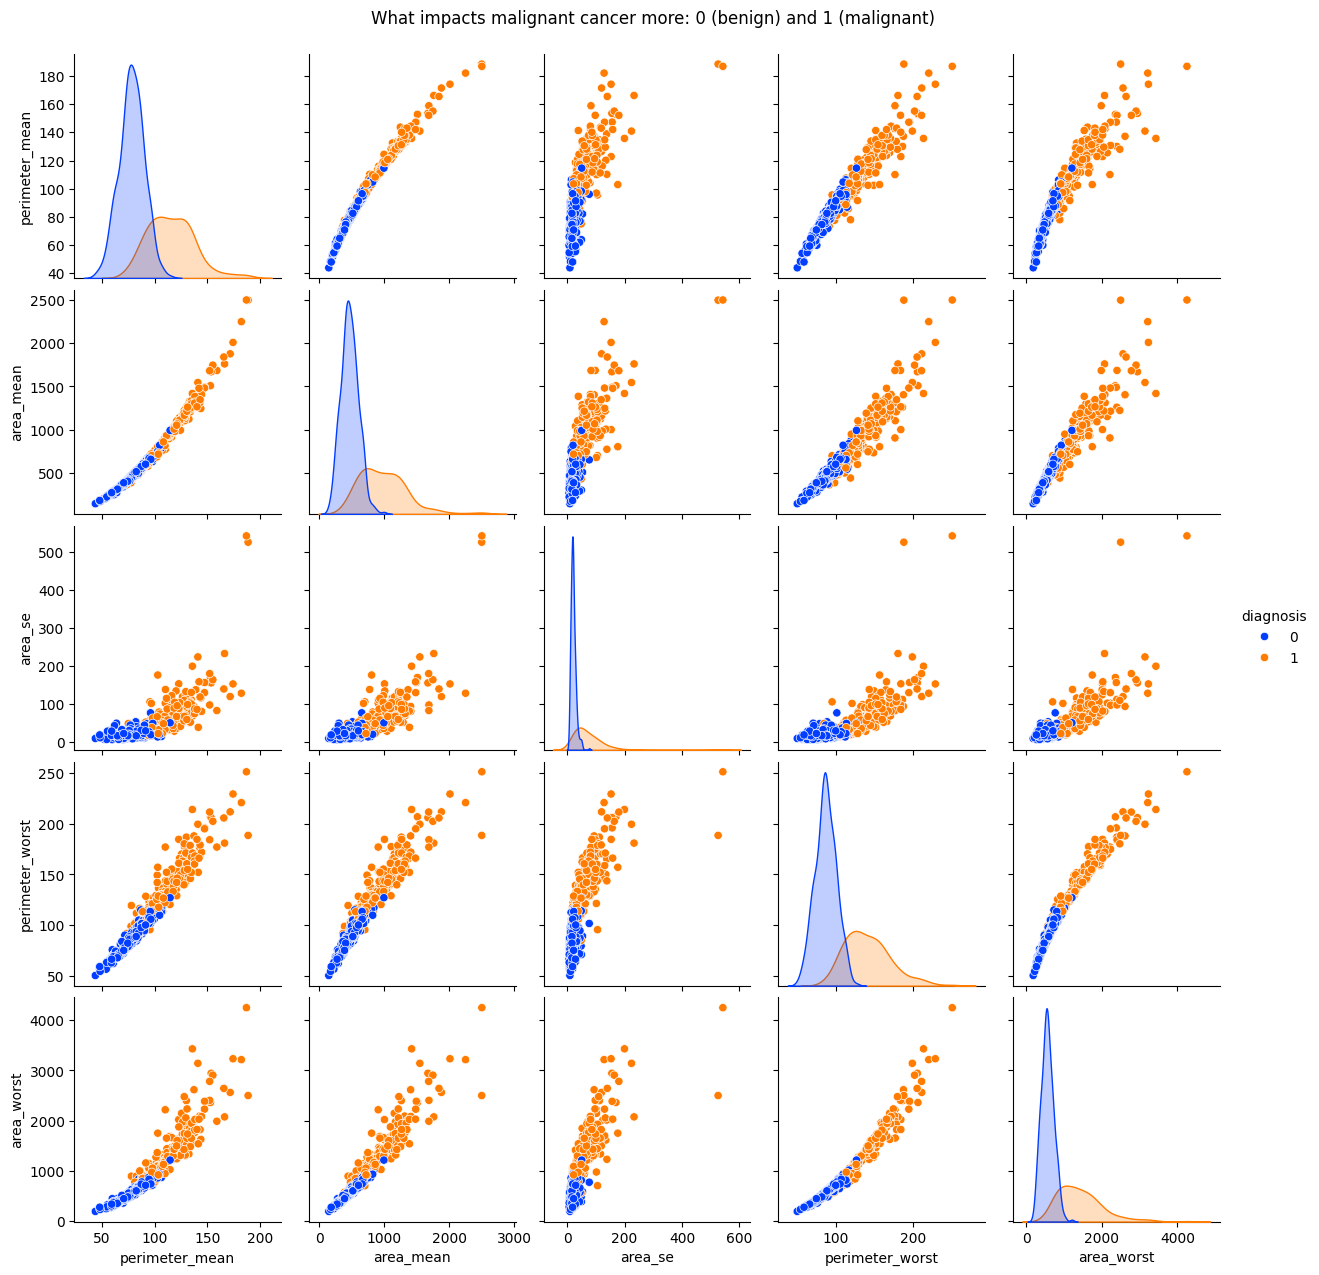

In [50]:
# Creating a pair plot for the selected features
top_5_features = ['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst', 'area_worst']
plt.figure(figsize=(10, 8))
sns.pairplot(df_k_best[top_5_features + ['diagnosis']], hue='diagnosis', palette='bright')
plt.suptitle('What impacts malignant cancer more: 0 (benign) and 1 (malignant)', y=1.02)
plt.show()

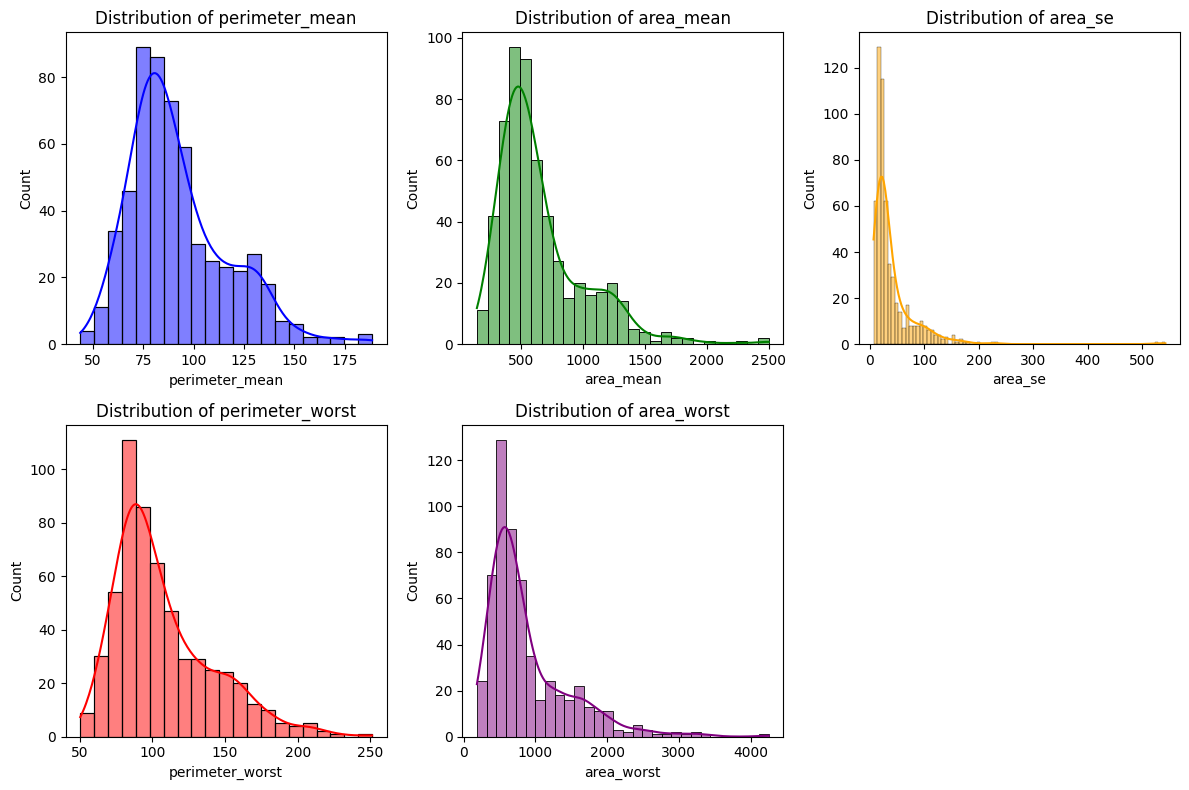

In [32]:
# Plot histograms for each feature
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange', 'red', 'purple']
for i, (feature, color) in enumerate(zip(best_5_features, colors), 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_5_best[feature], kde=True, color=color)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
# Save the figure
plt.savefig('distribution.png', bbox_inches='tight')
plt.show()

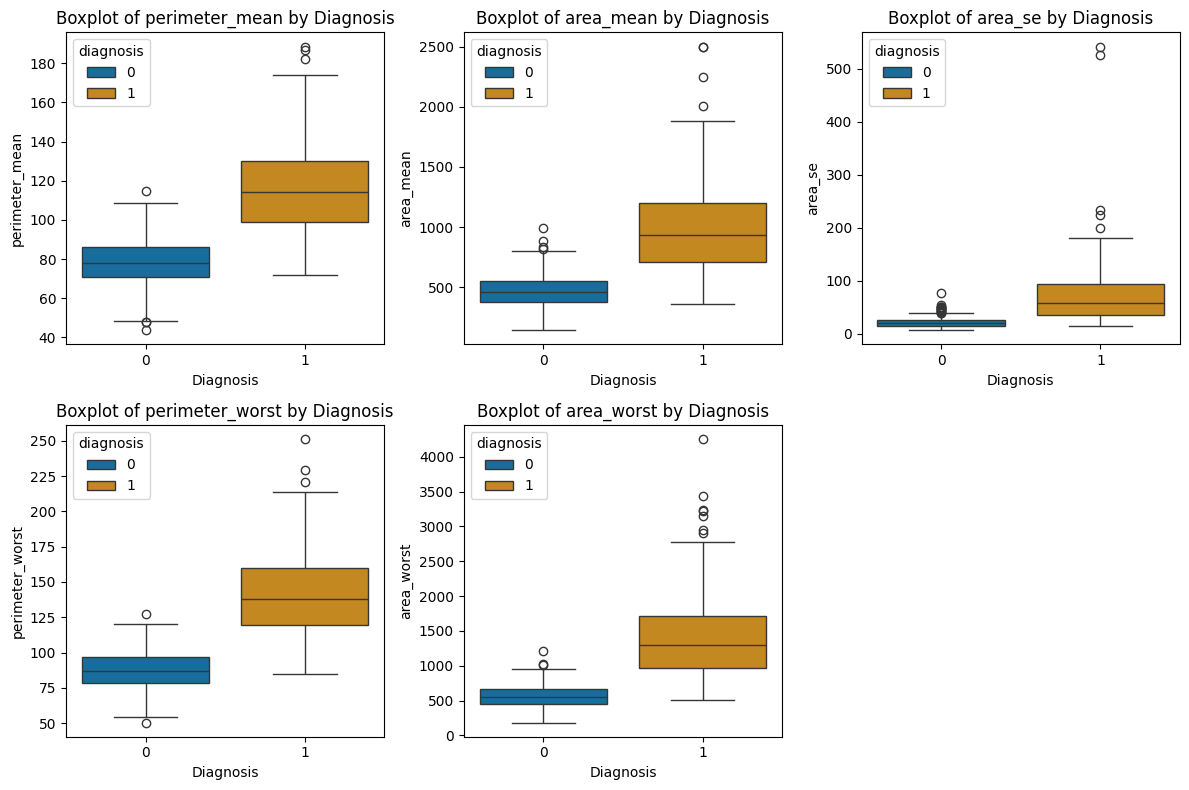

In [53]:
# List of top 5 features
top_5_features = ['perimeter_mean', 'area_mean', 'area_se',
                  'perimeter_worst', 'area_worst']

# Creating boxplots for each selected feature by diagnosis
plt.figure(figsize=(12, 8))
for i, feature in enumerate(top_5_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=df_k_best,
                hue='diagnosis', palette='colorblind')
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
plt.tight_layout()
# Save the figure
plt.savefig('boxplot.png', bbox_inches='tight')
plt.show()

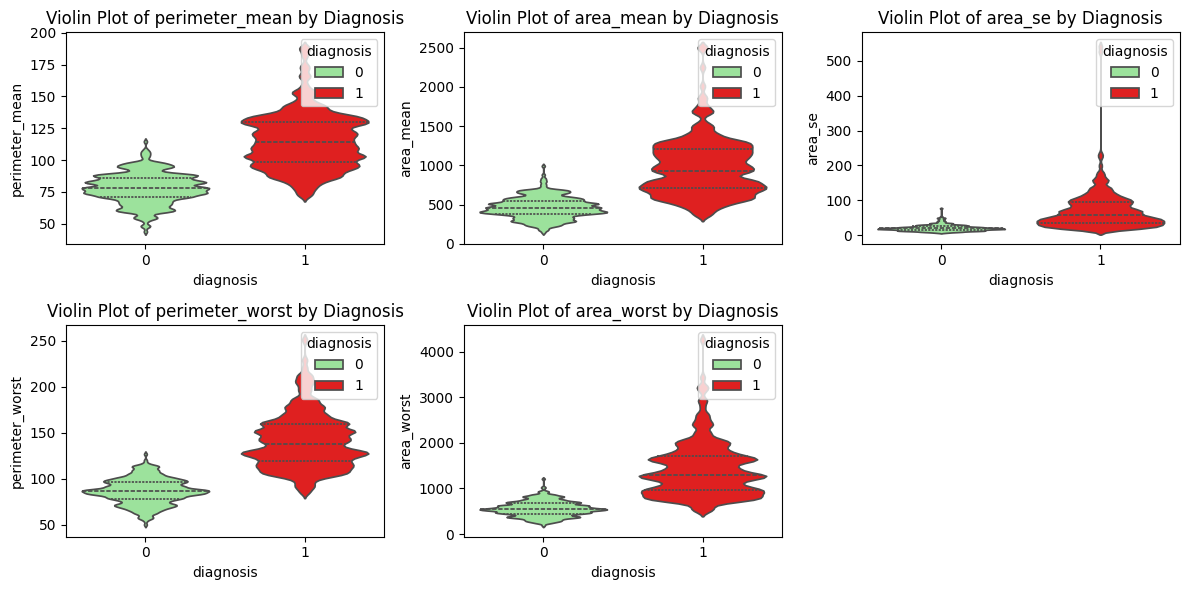

In [34]:
# Create violin plots for each feature with custom colors
plt.figure(figsize=(12, 6))
for i, (feature, color) in enumerate(zip(best_5_features, colors), 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='diagnosis', y=feature, data=df_5_best,
                   hue='diagnosis', palette=['lightgreen', 'red'],
                   bw_method=0.1, inner='quartile')
    plt.title(f'Violin Plot of {feature} by Diagnosis')
plt.tight_layout()
plt.show()

# **Step 5. Feature Scaling**

### Neural networks perform better when input data is standardized.</br>Feature scaling is the process of normalizing or standardizing the range of independent </br>variables or features in the data. This is done to ensure that no particular feature</br>dominates others due to its scale.

#### Why this is necessary before building a neural network:

- <u>Uniform Learning</u>: Feature scaling ensures that each feature contributes equally</br>during the training process, leading to more uniform learning.
- <u>Improved Model Accuracy</u>: Scaled features help in achieving better model accuracy</br>by preventing bias towards features with larger magnitudes.
- <u>Stability in Training</u>: Standardized data prevents numerical instability and overflow</br>issues during the training of the neural network.

In [35]:
# Current dataset for Feature Scaling
df_k_best

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,10.38,122.80,1001.0,0.30010,1.0950,8.589,153.40,25.380,17.33,184.60,2019.0,0.66560,0.7119,0.2654
1,1,20.57,17.77,132.90,1326.0,0.08690,0.5435,3.398,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,21.25,130.00,1203.0,0.19740,0.7456,4.585,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,20.38,77.58,386.1,0.24140,0.4956,3.445,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,14.34,135.10,1297.0,0.19800,0.7572,5.438,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.24390,1.1760,7.673,158.70,25.450,26.40,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,28.25,131.20,1261.0,0.14400,0.7655,5.203,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,28.08,108.30,858.1,0.09251,0.4564,3.425,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418
567,1,20.60,29.33,140.10,1265.0,0.35140,0.7260,5.772,86.22,25.740,39.42,184.60,1821.0,0.86810,0.9387,0.2650


In [36]:
# Separate features and target
X_for_scaling = df_k_best.drop('diagnosis', axis=1)
y_binary = df_k_best['diagnosis']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X_for_scaling)

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X_for_scaling.columns)

# Add the target variable back to the scaled DataFrame
df_scaled['diagnosis'] = y_binary.values

# Move the 'diagnosis' column to the start of the DataFrame
df_scaled = df_scaled[['diagnosis'] + list(df_scaled.columns[:-1])]

# Get the new scaled dataframe
df_scaled

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,1.097064,-2.073335,1.269934,0.984375,2.652874,2.489734,2.833031,2.487578,1.886690,-1.359293,2.303601,2.001237,2.616665,2.109526,2.296076
1,1,1.829821,-0.353632,1.685955,1.908708,-0.023846,0.499255,0.263327,0.742402,1.805927,-0.369203,1.535126,1.890489,-0.430444,-0.146749,1.087084
2,1,1.579888,0.456187,1.566503,1.558884,1.363478,1.228676,0.850928,1.181336,1.511870,-0.023974,1.347475,1.456285,1.082932,0.854974,1.955000
3,1,-0.768909,0.253732,-0.592687,-0.764464,1.915897,0.326373,0.286593,-0.288378,-0.281464,0.133984,-0.249939,-0.550021,3.893397,1.989588,2.175786
4,1,1.750297,-1.151816,1.776573,1.826229,1.371011,1.270543,1.273189,1.190357,1.298575,-1.466770,1.338539,1.220724,-0.313395,0.613179,0.729259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.110995,0.721473,2.060786,2.343856,1.947285,2.782080,2.379583,2.604187,1.901185,0.117700,1.752563,2.015301,-0.273318,0.664512,1.629151
565,1,1.704854,2.085134,1.615931,1.723842,0.693043,1.300499,1.156857,1.291565,1.536720,2.047399,1.421940,1.494959,-0.394820,0.236573,0.733827
566,1,0.702284,2.045574,0.672676,0.577953,0.046588,0.184892,0.276693,0.180698,0.561361,1.374854,0.579001,0.427906,0.350735,0.326767,0.414069
567,1,1.838341,2.336457,1.982524,1.735218,3.296944,1.157935,1.438530,1.009503,1.961239,2.237926,2.303601,1.653171,3.904848,3.197605,2.289985


# **Step 6. Split the data into training and testing sets</br>and create Feed Forward Neural Network the neural network model**

In [37]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
  X_scaled, y_binary, test_size=0.2, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape, '\n')

X_train: (455, 15)
X_test: (114, 15)
y_train: (455,)
y_test: (114,) 



In [38]:
# Define the model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
# Dropout to prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7297 (28.50 KB)
Trainable params: 7297 (28.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Assign Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Assign Model checkpointing
model_checkpoint = ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=25,
                    batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/25
12/12 [==============================] - 0s 37ms/step - loss: 0.1205 - accuracy: 0.9643 - val_loss: 0.1175 - val_accuracy: 0.9451
Epoch 2/25
12/12 [==============================] - 0s 15ms/step - loss: 0.0976 - accuracy: 0.9725 - val_loss: 0.1157 - val_accuracy: 0.9560
Epoch 3/25
12/12 [==============================] - 0s 12ms/step - loss: 0.1047 - accuracy: 0.9643 - val_loss: 0.1164 - val_accuracy: 0.9560
Epoch 4/25
12/12 [==============================] - 0s 14ms/step - loss: 0.1072 - accuracy: 0.9670 - val_loss: 0.1170 - val_accuracy: 0.9560
Epoch 5/25
12/12 [==============================] - 0s 11ms/step - loss: 0.0906 - accuracy: 0.9698 - val_loss: 0.1163 - val_accuracy: 0.9560
Epoch 6/25
12/12 [==============================] - 0s 10ms/step - loss: 0.0866 - accuracy: 0.9725 - val_loss: 0.1197 - val_accuracy: 0.9451
Epoch 7/25
12/12 [==============================] - 0s 14ms/step - loss: 0.0916 - accuracy: 0.9725 - val_loss: 0.1183 - val_accuracy: 0.9451
Epoch 8/25
12

# **Step 7. Evaluating the Model**

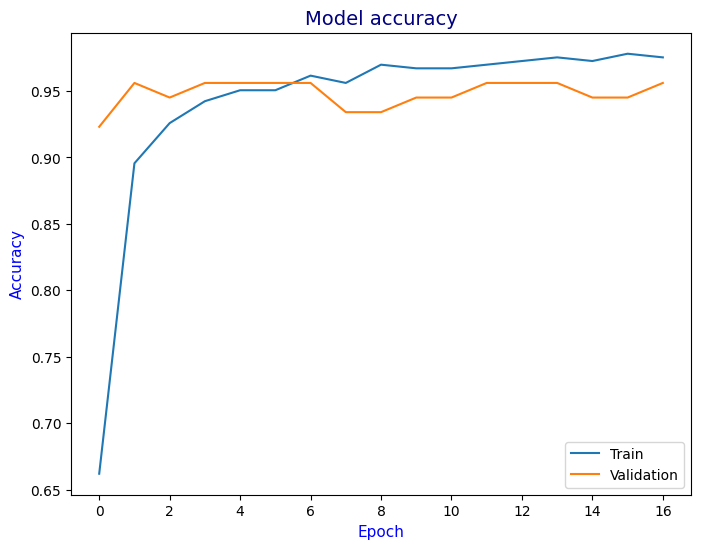

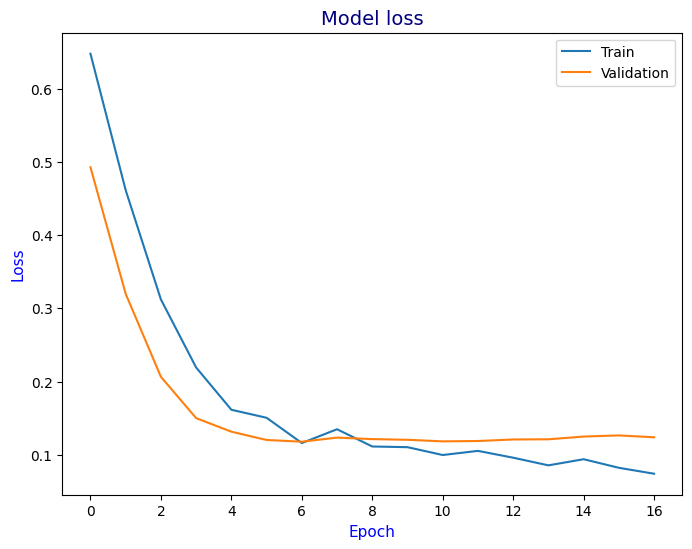

In [40]:
# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', color='navy', fontsize=14)
plt.ylabel('Accuracy', color='blue', fontsize=11)
plt.xlabel('Epoch', color='blue', fontsize=11)
plt.legend(['Train', 'Validation'])
# Save the figure
plt.savefig('model_accuracy.png', bbox_inches='tight')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', color='navy', fontsize=14)
plt.ylabel('Loss', color='blue', fontsize=11)
plt.xlabel('Epoch', color='blue', fontsize=11)
plt.legend(['Train', 'Validation'])
# Save the figure
plt.savefig('model_loss.png', bbox_inches='tight')
plt.show()


In [41]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

4/4 [==============================] - 0s 5ms/step - loss: 0.0783 - accuracy: 0.9737
Test Accuracy: 0.97


In [42]:
# Generate a classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### **Interpretation of result**

<u>High Precision and Recall</u>: Both precision and recall are high for both classes, indicating<br>that the model is good at correctly identifying both benign and malignant cases with few<br>false positives and false negatives.

<u>High F1-Scores</u>: High F1-scores for both classes suggest that the model is balanced in terms<br>of precision and recall, making it reliable for predicting both benign and malignant cases.
    
<u>Accuracy</u>: A high accuracy of 97% indicates that the model correctly predicted the class labels<br>for 97% of the test instances.
    
<u>Balanced Performance</u>: The macro and weighted averages are also high and close to each other,<br>indicating consistent performance across both classes.

**Overall, these results suggest that my model performs very well in predicting both benign and malignant breast cancer cases**.

Confusion Matrix:
[[70  1]
 [ 2 41]]


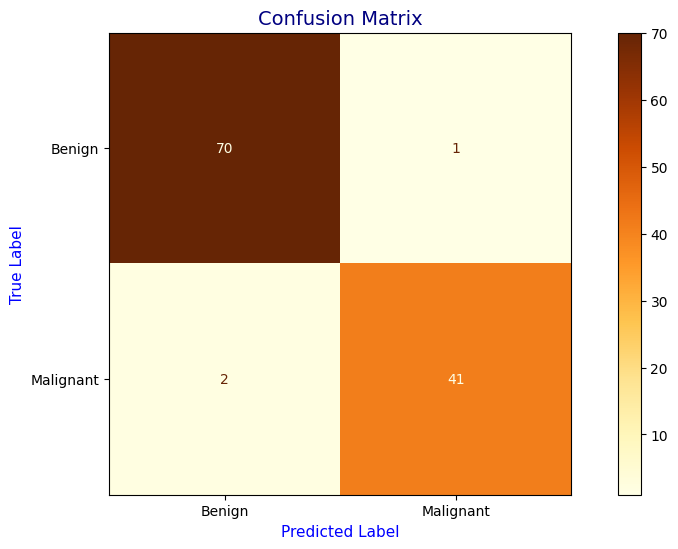

In [43]:
# Generate and display confusion matrix with labels
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix result
print("Confusion Matrix:")
print(cm)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 6))

# Define the colormap I want to use
colormap = plt.cm.YlOrBr

# Assign Confusion matrix display object with labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=['Benign', 'Malignant'])

# Plot the confusion matrix with the specified colormap on the created axis
cm_display.plot(ax=ax, cmap=colormap)

# Customize the plot
plt.title('Confusion Matrix', color='navy', fontsize=14)
plt.xlabel('Predicted Label', color='blue', fontsize=11)
plt.ylabel('True Label', color='blue', fontsize=11)
# Save the figure
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()

### **Explanation Confusion Matrix**

<u>True Positive (TN) = 70</u>: These are the cases where the model correctly predicted the positive class (Benign).

<u>True Negative (TP) = 41</u>: These are the cases where the model correctly predicted the negative class (Malignant).

<u>False Positive (FP) = 1</u>: These are the cases where the model incorrectly predicted the positive class (Malignant)<br>when it was actually negative (Benign). This is also known as a Type I error.
    
<u>False Negative (FN) = 2</u>: These are the cases where the model incorrectly predicted the negative class (Benign)<br>when it was actually positive (Malignant). This is also known as a Type II error.

**To summarize the result**:

- the model correctly identified 70 benign cases and 41 malignant cases;
- the model incorrectly identified 1 benign case as malignant;
- the model incorrectly identified 2 malignant cases as benign.

In [44]:
# Calculate additional metrics:

# Number of correct predictions over all predictions
accuracy = accuracy_score(y_test, y_pred)

# How many of the positive predictions made are correct (true positives)
precision = precision_score(y_test, y_pred)

# How many of the positive cases the model predicted correctly (true positives)
recall = recall_score(y_test, y_pred)

# Combination of precision and recall.
# Generally described as the harmonic mean of the two
f1 = f1_score(y_test, y_pred)

# How many negative predictions made are correct (true negatives)
specificity = specificity_score(y_test, y_pred)

# Area Under the Receiver Operating Characteristic Curve (AUC ROC)
# Measures the ability of the classifier to distinguish between classes.
# A higher AUC value indicates a better performance.
auc = roc_auc_score(y_test, y_pred)

# Calculate the average precision score for the Precision-Recall curve
avg_precision_recall = average_precision_score(y_test, y_pred)

# Print all scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'AUC-ROC: {auc:.2f}')
print(f'Precision-Recall Curve: {avg_precision_recall:.2f}')

Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1-Score: 0.96
Specificity: 0.99
AUC-ROC: 0.97
Precision-Recall Curve: 0.95


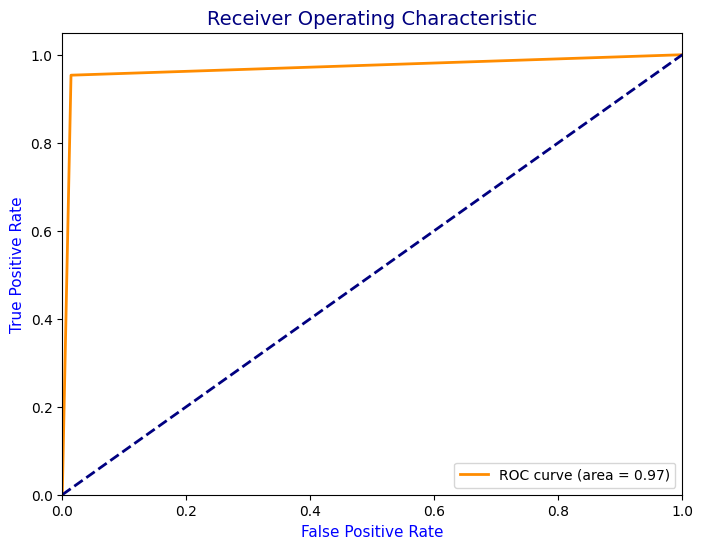

In [45]:
# Generate AUC-ROC curve:

# False positive rates (fpr), true positive rates (tpr),
# thresholds for various points on the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Create a new figure with a specific size
plt.figure(figsize=(8, 6))
# Plot the ROC curve with AUC
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc)
# Plot a diagonal line (baseline)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Set x-axis limits
plt.xlim([0.0, 1.0])
# Set y-axis limits
plt.ylim([0.0, 1.05])
# Set x-axis label
plt.xlabel('False Positive Rate', color='blue', fontsize=11)
# Set y-axis label
plt.ylabel('True Positive Rate', color='blue', fontsize=11)
# Set the title of the plot
plt.title('Receiver Operating Characteristic', color='navy', fontsize=14)
# Display legend in the lower right corner
plt.legend(loc="lower right")

# Save the figure
plt.savefig('roc_curve.png', bbox_inches='tight')
# Show the plot
plt.show()

### **Area Under the Curve: 97%**

#### The score indicates a high level of performance for the model in distinguishing<br>between the positive class (malignant) and the negative class (benign) across various threshold levels.<br>A higher AUC value indicates better model performance.

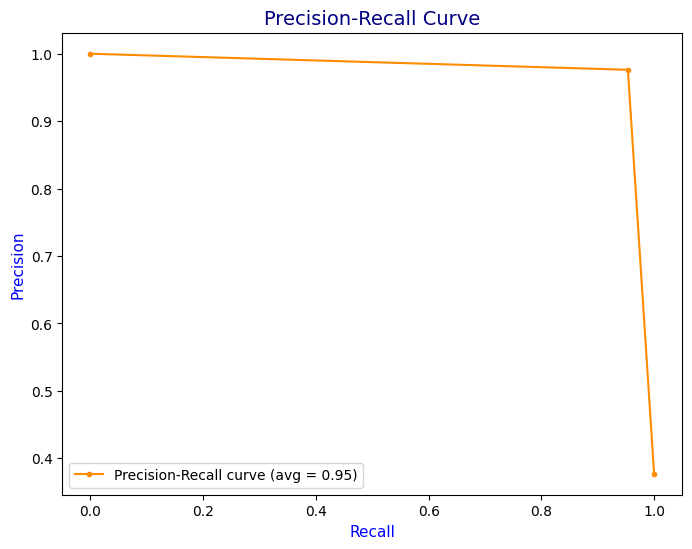

In [46]:
# Assign precision_2 variables to make Precision-Recall Curve
# to distinguish it from the precision score in calculate additional metrics
precision_2 = precision_score(y_test, y_pred)

# Assign recall_2 variables to make Precision-Recall Curve
# to distinguish it from the recall score in calculate additional metrics
recall_2 = recall_score(y_test, y_pred)

# Generate Precision-Recall Curve
precision_values, recall_2, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_pred)

# Create a new figure with a specific size
plt.figure(figsize=(8, 6))
plt.plot(recall_2, precision_values, color='darkorange', marker='.',
         label='Precision-Recall curve (avg = %0.2f)' % average_precision)

plt.xlabel('Recall', color='blue', fontsize=11)
plt.ylabel('Precision', color='blue', fontsize=11)
plt.title('Precision-Recall Curve', color='navy', fontsize=14)
# Add a legend to the plot
plt.legend(loc='best')

# Save the figure
plt.savefig('precision_recall.png', bbox_inches='tight')
plt.show()

### **Precision-Recall Curve: 95%**

#### The score of 0.95 indicates a high level of performance for the model in correctly<br>identifying positive cases (malignant) while minimizing false positives.
#### This metric is particularly useful in scenarios where the positive class<br> is more critical to identify correctly than the negative class.

# **Step 8. Saving the Model**

In [47]:
# Save the trained model
model.save('breast_cancer_model.h5')

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
# Load the model
loaded_model = load_model('breast_cancer_model.h5')

# Use the model to predict or evaluate
result = loaded_model.evaluate(X_test, y_test)
print('Model Loss: %.2f' % result[0])
print('Model Accuracy: %.2f' % result[1])

# Load the scaler
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

4/4 [==============================] - 0s 4ms/step - loss: 0.0783 - accuracy: 0.9737
Model Loss: 0.08
Model Accuracy: 0.97


# **Step 9. Conclusion**

In [49]:
# Initialize data of lists with scores.
total_metrics = {
    'Feed Forward Neural Network  metrics':
     [f'{accuracy:.2f}',
      f'{precision:.2f}',
      f'{recall:.2f}',
      f'{f1:.2f}',
      f'{specificity:.2f}',
      f'{auc:.2f}',
      f'{avg_precision_recall:.2f}']
    }

# Creates pandas DataFrame.
df_metrics = pd.DataFrame(total_metrics,
                          index=['Accuracy',
                                 'Precision',
                                 'Recall',
                                 'F1 Score',
                                 'Specificity',
                                 'Area Under the ROC',
                                 'Precision-Recall Curve']
                          )

# Displaying the dataframe.
df_metrics

,Feed Forward Neural Network metrics
Accuracy,0.97
Precision,0.98
Recall,0.95
F1 Score,0.96
Specificity,0.99
Area Under the ROC,0.97
Precision-Recall Curve,0.95


### **The evaluation metrics and curve analysis indicate that Feed Forward Neural Network model<br>performs exceptionally well on the task of breast cancer diagnosis.**


#### **Accuracy**: 97%
#### The model's overall accuracy is very high, with 97% of the predictions being correct.<br>This suggests that the model is generally reliable in distinguishing between benign and malignant cases.

#### **Precision**: 98%
Precision measures the ratio of true positive predictions to the total positive predictions (true positives and false positives).<br>With a precision of 98%, the model is very good at correctly identifying malignant cases with a low rate of false positives.<br>This is crucial in medical diagnosis, as it minimizes the number of benign cases wrongly classified as malignant.

#### **Recall**: 95%
Recall (or sensitivity) measures the ratio of true positive predictions to the total actual positive cases<br>(true positives and false negatives). With a recall of 95%, the model effectively identifies the majority of<br>malignant cases, ensuring that few malignant cases are missed.

#### **F1 Score**: 96%
The F1 Score is the harmonic mean of precision and recall. A high F1 Score of 96% indicates a good balance<br>between precision and recall, meaning the model is both accurate and consistent in identifying malignant cases.

#### **Specificity**: 99%
Specificity measures the ratio of true negative predictions to the total actual negative cases<br>(true negatives and false positives). With a specificity of 99%, the model is highly effective at correctly<br>identifying benign cases, ensuring that benign cases are rarely misclassified as malignant.

#### **AUC (Area Under the ROC)**: 97%
The AUC value of 97% indicates a high level of performance for the model in distinguishing<br>between the positive class (malignant) and the negative class (benign) across various threshold levels.<br>A higher AUC value indicates better model performance.

#### **Precision-Recall Curve**: 95%
The score of 95% indicates a high level of performance for the model in correctly identifying<br>positive cases (malignant) while minimizing false positives. This metric is particularly useful<br>in scenarios where the positive class is more critical to identify correctly than the negative class.

### **Based on the provided evaluation metrics and performance plots,<br>the neural network model for breast cancer diagnosis demonstrates excellent performance.**